# Carga inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar datasets original y modificado
df_objetivo = pd.read_csv("../../data/raw/steel_energy_original.csv")
df = pd.read_csv("../../data/raw/steel_energy_modified.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             35339 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  35339 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  35327 non-null  object
 4   CO2(tCO2)                             35370 non-null  object
 5   Lagging_Current_Power_Factor          35291 non-null  object
 6   Leading_Current_Power_Factor          35338 non-null  object
 7   NSM                                   35325 non-null  object
 8   WeekStatus                            35400 non-null  object
 9   Day_of_week                           35428 non-null  object
 10  Load_Type                             35432 non-null  object
 11  mixed_type_col              

In [3]:
df.describe(include='all')

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
count,35401,35339,35339,35327,35370,35291,35338,35325,35400,35428,35432,32294
unique,34753,4410,2918,1336,249,6478,3968,517,5,15,7,1002
top,NAN,3.06,0.0,0.0,0.0,100.0,100.0,52200.0,Weekday,Monday,Light_Load,unknown
freq,23,605,6866,22358,20009,7082,23037,357,24048,4876,17366,3612


# Limpieza General

In [4]:
# Limpieza General de df

# Homologar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Eliminar duplicados y filas completamente vacías
df = df.drop_duplicates().reset_index(drop=True)
df.dropna(how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35396 non-null  object
 1   usage_kwh                             35334 non-null  object
 2   lagging_current_reactive.power_kvarh  35334 non-null  object
 3   leading_current_reactive_power_kvarh  35322 non-null  object
 4   co2(tco2)                             35365 non-null  object
 5   lagging_current_power_factor          35286 non-null  object
 6   leading_current_power_factor          35333 non-null  object
 7   nsm                                   35320 non-null  object
 8   weekstatus                            35395 non-null  object
 9   day_of_week                           35423 non-null  object
 10  load_type                             35427 non-null  object
 11  mixed_type_col              

In [5]:
df.sample(10)

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type,mixed_type_col
30892,18/11/2018 19:15,3.78,0.0,17.96,0.0,100.0,20.6,70221.0,Weekend,Sunday,Maximum_Load,bad
4837,20/02/2018 09:30,84.17,NaN,0.0,0.04,91.82,100.0,34200.0,Weekday,Tuesday,Medium_Load,unknown
25217,20/09/2018 16:30,43.16,19.3,0.0,0.02,91.29,100.0,59400.0,Weekday,Thursday,Maximum_Load,282
18752,15/07/2018 08:15,56.88,42.66,0.0,0.03,80.0,100.0,NaN,Weekend,Sunday,Light_Load,932
25300,21/09/2018 13:15,18.18,0.65,8.1,0.01,99.94,91.34,47700.0,Weekday,Friday,Maximum_Load,NaN
28860,28/10/2018 15:15,3.06,0.0,10.48,0.0,100.0,28.03,54900.0,Weekend,Sunday,Light_Load,488
6512,09/03/2018 20:15,4.18,0.0,27.4,0.0,100.0,15.08,72900.0,Weekday,Friday,Medium_Load,NaN
18808,15/07/2018 22:15,4.72,0.0,22.1,0.0,100.0,20.89,80100.0,Weekend,Sunday,Medium_Load,bad
7091,15/03/2018 21:00,34.09,3.53,5.54,0.02,99.47,98.71,75600.0,Weekday,Thursday,Medium_Load,552
27366,13/10/2018 01:45,3.56,7.34,0.0,0.0,43.64,100.0,6300.0,wEEKEND,Saturday,Light_Load,350


# Correcciones de formato

## Correción date

In [6]:
# Conversión de fecha
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)

/var/folders/d2/_ymf9_q51mgdl52l2xg1sq1w0000gn/T/ipykernel_84881/2404955314.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


In [7]:
df["date"]

0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35730   2018-06-06 02:15:00
35731   2018-11-02 02:45:00
35732                   NaT
35733                   NaT
35734   2018-11-02 22:30:00
Name: date, Length: 35735, dtype: datetime64[ns]

## Correción columnas numéricas

In [8]:
# Conversión de tipo object a float64
df['usage_kwh'] = pd.to_numeric(df['usage_kwh'], errors='coerce')
df['lagging_current_reactive.power_kvarh'] = pd.to_numeric(df['lagging_current_reactive.power_kvarh'], errors='coerce')
df['leading_current_reactive_power_kvarh'] = pd.to_numeric(df['leading_current_reactive_power_kvarh'], errors='coerce')
df['lagging_current_power_factor'] = pd.to_numeric(df['lagging_current_power_factor'], errors='coerce')
df['leading_current_power_factor'] = pd.to_numeric(df['leading_current_power_factor'], errors='coerce')
df["nsm"] = pd.to_numeric(df["nsm"], errors='coerce')
# df["nsm"] = df["nsm"].astype('Int64')
df["co2(tco2)"] = pd.to_numeric(df["co2(tco2)"], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  13272 non-null  datetime64[ns]
 1   usage_kwh                             35219 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35205 non-null  float64       
 3   leading_current_reactive_power_kvarh  35181 non-null  float64       
 4   co2(tco2)                             35225 non-null  float64       
 5   lagging_current_power_factor          35163 non-null  float64       
 6   leading_current_power_factor          35209 non-null  float64       
 7   nsm                                   35180 non-null  float64       
 8   weekstatus                            35395 non-null  object        
 9   day_of_week                           35423 non-null  object        
 10

## Corrección columnas texto

In [9]:
cols_texto = ['weekstatus', 'day_of_week', 'load_type']

for col in cols_texto:
    print(df[col].unique())

['Weekday' ' wEEKDAY ' nan 'Weekend' ' wEEKEND ' ' NAN ']
['Monday' ' mONDAY ' ' tUESDAY ' 'Tuesday' 'Wednesday' ' wEDNESDAY '
 'Thursday' ' tHURSDAY ' 'Friday' ' fRIDAY ' 'Saturday' ' sATURDAY '
 'Sunday' ' sUNDAY ' nan ' NAN ']
['Light_Load' ' lIGHT_lOAD ' nan 'Medium_Load' 'Maximum_Load'
 ' mEDIUM_lOAD ' ' mAXIMUM_lOAD ' ' NAN ']


In [10]:
# Normalizar formato de texto en tres columnas específicas
# cols_texto = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in cols_texto:
    if col in df.columns:
        # Convertir a minúsculas y luego capitalizar solo la primera letra
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].astype(str).str.lower()
        df[col] = df[col].str.capitalize()


In [11]:
for col in cols_texto:
    print(df[col].unique())

['Weekday' 'Nan' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday'
 'Nan']
['Light_load' 'Nan' 'Medium_load' 'Maximum_load']


In [12]:
# Identificar NaNs
for col in cols_texto:
    # Convertir texto 'nan', 'NaN', 'None', etc. en np.nan real
    df[col] = df[col].replace(['nan', 'Nan', 'None', 'NONE', 'Na'], np.nan)

    # Contar valores NaN después de las transformaciones
print("\nConteo de valores NaN por columna:")
print(df.isna().sum())


Conteo de valores NaN por columna:
date                                    22463
usage_kwh                                 516
lagging_current_reactive.power_kvarh      530
leading_current_reactive_power_kvarh      554
co2(tco2)                                 510
lagging_current_power_factor              572
leading_current_power_factor              526
nsm                                       555
weekstatus                                362
day_of_week                               327
load_type                                 328
mixed_type_col                           3444
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  13272 non-null  datetime64[ns]
 1   usage_kwh                             35219 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35205 non-null  float64       
 3   leading_current_reactive_power_kvarh  35181 non-null  float64       
 4   co2(tco2)                             35225 non-null  float64       
 5   lagging_current_power_factor          35163 non-null  float64       
 6   leading_current_power_factor          35209 non-null  float64       
 7   nsm                                   35180 non-null  float64       
 8   weekstatus                            35373 non-null  object        
 9   day_of_week                           35408 non-null  object        
 10

In [14]:
df.sample(20)

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type,mixed_type_col
31970,NaT,4.00,4.79,0.00,0.00,64.10,100.00,2700.0,Weekday,Friday,Light_load,bad
35229,NaT,44.68,17.28,0.00,0.02,93.27,100.00,69300.0,Weekday,Wednesday,Medium_load,708
18628,NaT,2.66,4.21,0.00,0.00,NaN,100.00,4500.0,Weekend,Saturday,Light_load,733
17626,2018-03-07 14:45:00,71.32,39.06,0.00,0.03,87.71,100.00,53100.0,Weekday,Tuesday,Maximum_load,885
14567,2018-01-06 18:00:00,49.39,10.73,0.18,0.02,97.72,100.00,64800.0,Weekday,Friday,Medium_load,unknown
22791,NaT,5.62,0.00,18.94,0.00,100.00,28.45,36000.0,Weekend,Sunday,Medium_load,83
21513,NaT,2.81,5.72,0.00,0.00,44.09,100.00,9000.0,Weekday,Monday,Light_load,278
2417,NaT,35.35,25.99,0.00,0.02,80.57,100.00,1490400.0,Weekday,Friday,Light_load,NaN
6925,NaT,3.28,4.93,0.00,0.00,55.39,100.00,12600.0,Weekday,Wednesday,Light_load,unknown
12854,NaT,3.89,0.00,24.98,NaN,100.00,15.39,78300.0,Weekday,Monday,Medium_load,unknown


In [15]:
# Llamar fila con indice igual a 32905

df[df.index == 32905]

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type,mixed_type_col
32905,2018-09-12 18:30:00,3.31,0.0,9.25,0.0,100.0,33.69,66600.0,Weekend,Sunday,Light_load,124


# Analisis Univariado

## Columnas numéricas

Estadísticas para la columna: usage_kwh
count    35219.000000
mean        39.400554
std        276.535424
min          0.000000
5%           2.740000
25%          3.240000
50%          4.610000
75%         52.060000
96%        107.930000
99%        143.677400
99.5%      588.745600
max      34899.480000
Name: usage_kwh, dtype: float64


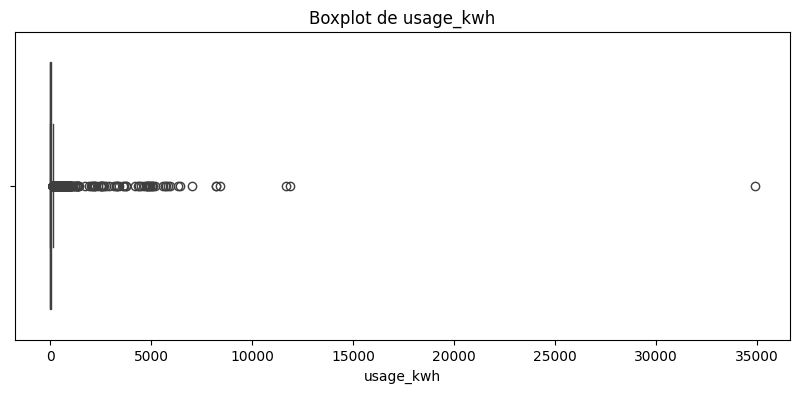

Estadísticas para la columna: lagging_current_reactive.power_kvarh
count    35205.000000
mean        18.735003
std         89.882949
min          0.000000
5%           0.000000
25%          2.300000
50%          5.000000
75%         23.330000
96%         52.733600
99%         74.628400
99.5%      444.955800
max       6145.920000
Name: lagging_current_reactive.power_kvarh, dtype: float64


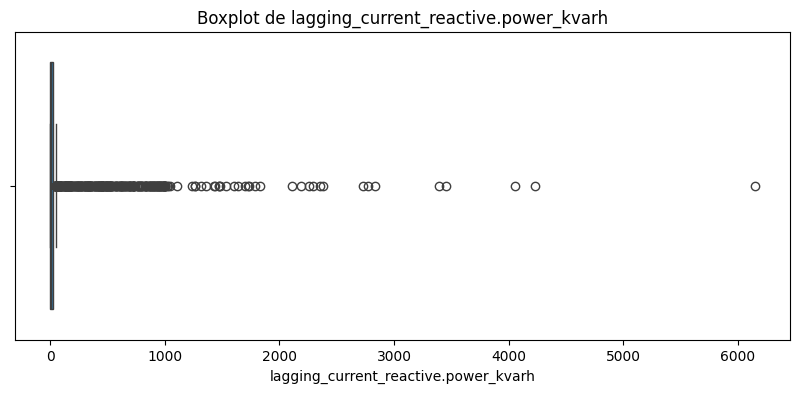

Estadísticas para la columna: leading_current_reactive_power_kvarh
count    35181.000000
mean         7.618227
std         55.112510
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          2.590000
96%         23.690000
99%         26.820000
99.5%      251.284000
max       2301.840000
Name: leading_current_reactive_power_kvarh, dtype: float64


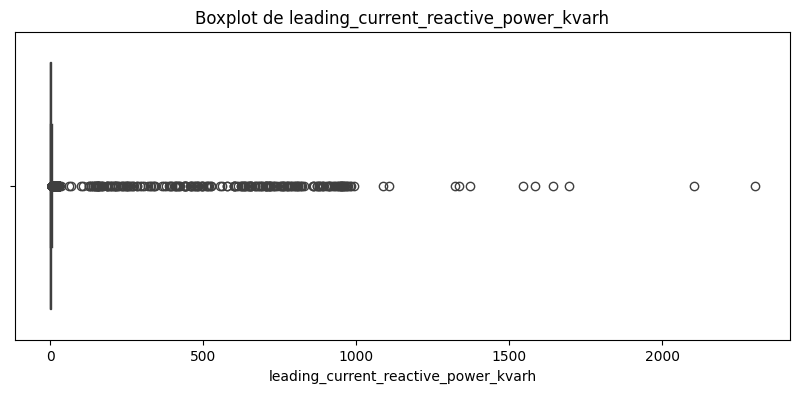

Estadísticas para la columna: co2(tco2)
count    35225.000000
mean         2.636226
std         41.639451
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.020000
96%          0.050000
99%          0.060000
99.5%        2.936400
max       1364.040000
Name: co2(tco2), dtype: float64


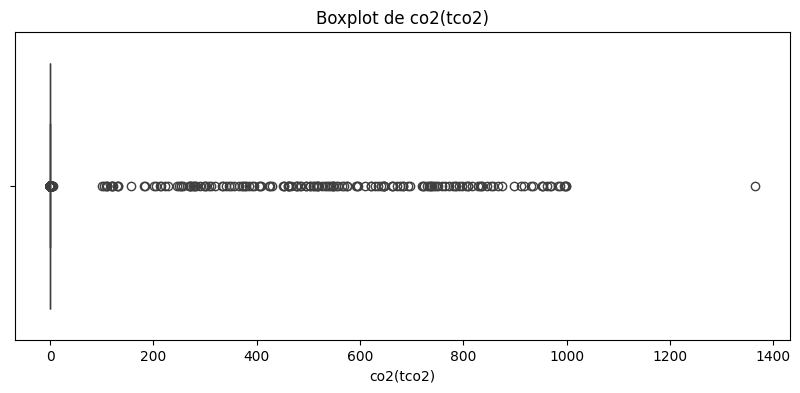

Estadísticas para la columna: lagging_current_power_factor
count    35163.000000
mean       101.638450
std        316.400521
min          0.000000
5%          46.970000
25%         63.550000
50%         88.210000
75%         99.460000
96%        100.000000
99%        100.000000
99.5%      914.709100
max       9900.000000
Name: lagging_current_power_factor, dtype: float64


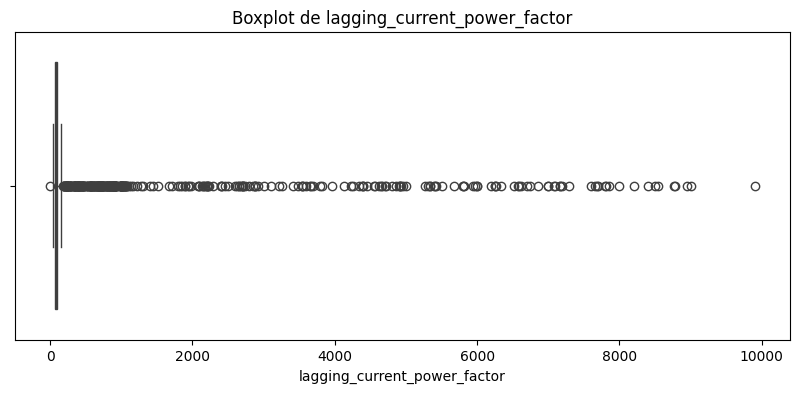

Estadísticas para la columna: leading_current_power_factor
count    35209.000000
mean       109.391626
std        371.810045
min          0.000000
5%          18.700000
25%         99.720000
50%        100.000000
75%        100.000000
96%        100.000000
99%        225.920000
99.5%     1018.648000
max       9800.000000
Name: leading_current_power_factor, dtype: float64


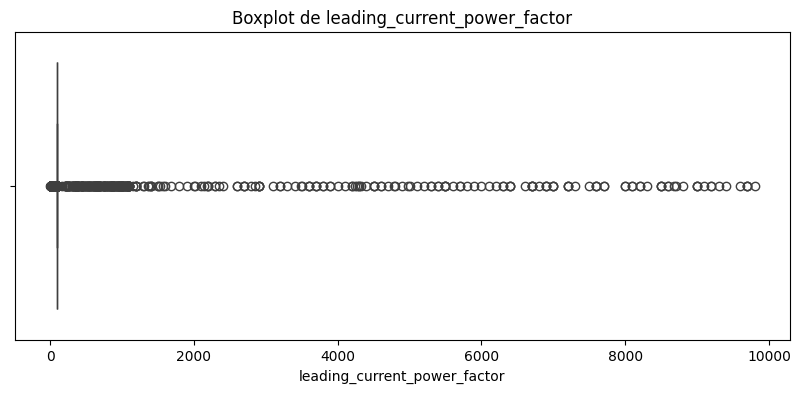

Estadísticas para la columna: nsm
count    3.518000e+04
mean     5.264808e+04
std      1.928988e+05
min      0.000000e+00
5%       3.600000e+03
25%      2.160000e+04
50%      4.320000e+04
75%      6.480000e+04
96%      8.280000e+04
99%      8.550000e+04
99.5%    8.550000e+04
max      7.783200e+06
Name: nsm, dtype: float64


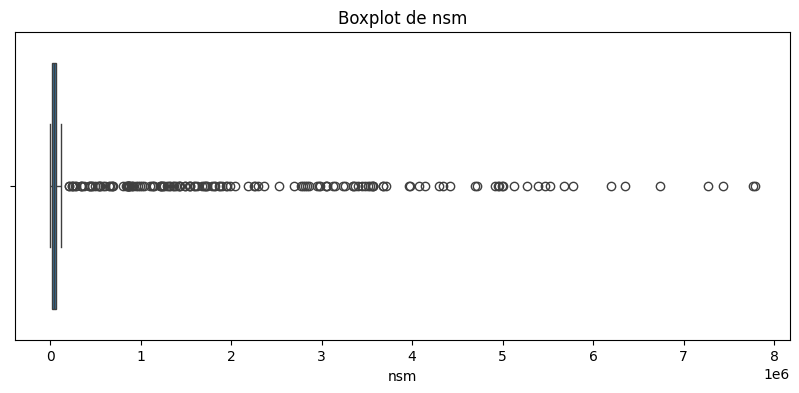

In [16]:
numeric_columns = [
    'usage_kwh', 'lagging_current_reactive.power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2(tco2)',
       'lagging_current_power_factor', 'leading_current_power_factor',
    'nsm'
]


for col in numeric_columns:
    print(f'Estadísticas para la columna: {col}')
    print(df[col].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.96, 0.99,0.995]))
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Columnas categóricas

In [17]:
text_columns = df.select_dtypes(include=['object']).columns.tolist()

text_columns

['weekstatus', 'day_of_week', 'load_type', 'mixed_type_col']

Estadísticas para la columna: weekstatus
count       35373
unique          2
top       Weekday
freq        25290
Name: weekstatus, dtype: object


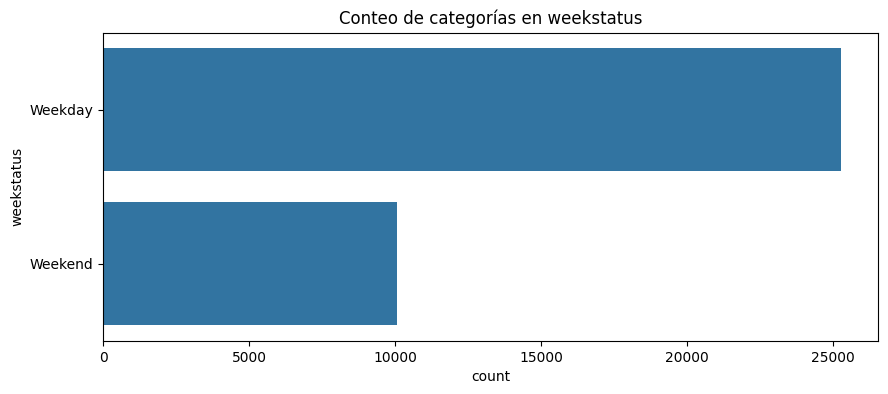

Estadísticas para la columna: day_of_week
count      35408
unique         7
top       Monday
freq        5143
Name: day_of_week, dtype: object


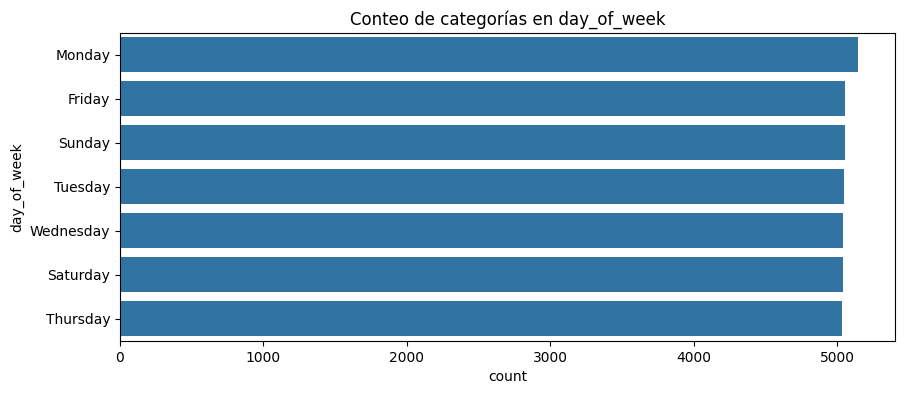

Estadísticas para la columna: load_type
count          35407
unique             3
top       Light_load
freq           18277
Name: load_type, dtype: object


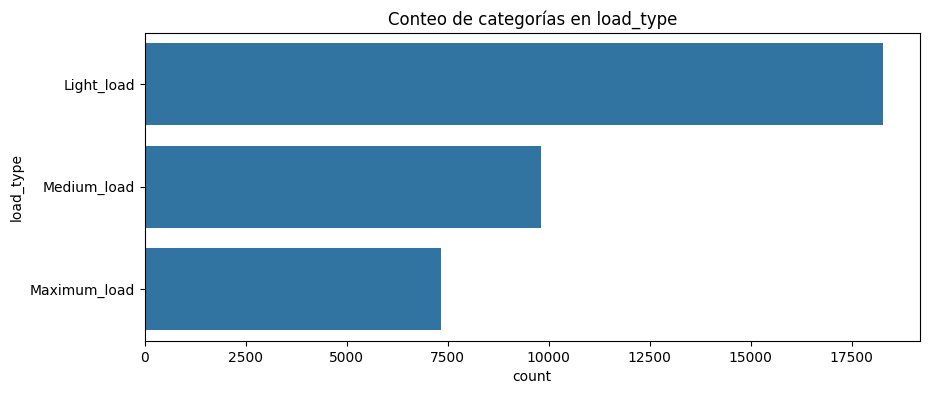

Estadísticas para la columna: mixed_type_col
count       32291
unique       1002
top       unknown
freq         3610
Name: mixed_type_col, dtype: object


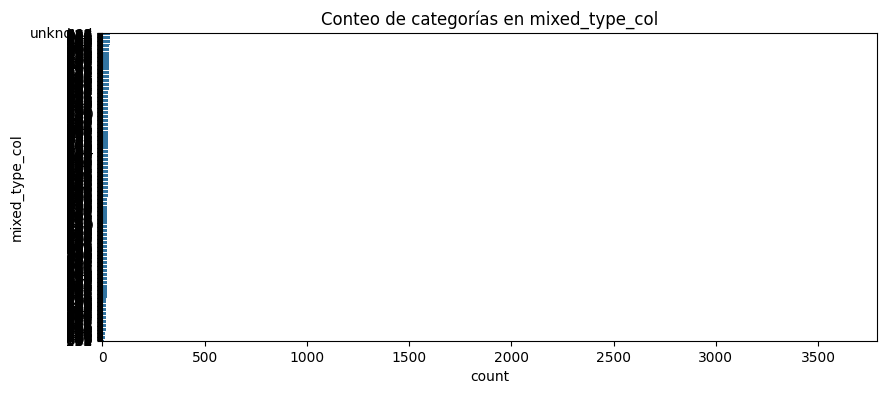

In [18]:
for col in text_columns:
    print(f'Estadísticas para la columna: {col}')
    print(df[col].describe())
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Conteo de categorías en {col}')
    plt.show()

In [19]:
df["mixed_type_col"].sample(20)

23267        NaN
14262        477
1078          10
23116        557
35450        NaN
16004    unknown
14564        322
14103        802
23846        849
29240        864
14578        453
26903        443
13497        634
35427        bad
29795        599
12319        144
26930        267
16490        829
4329         644
8388     unknown
Name: mixed_type_col, dtype: object

# Analisis Multivariado

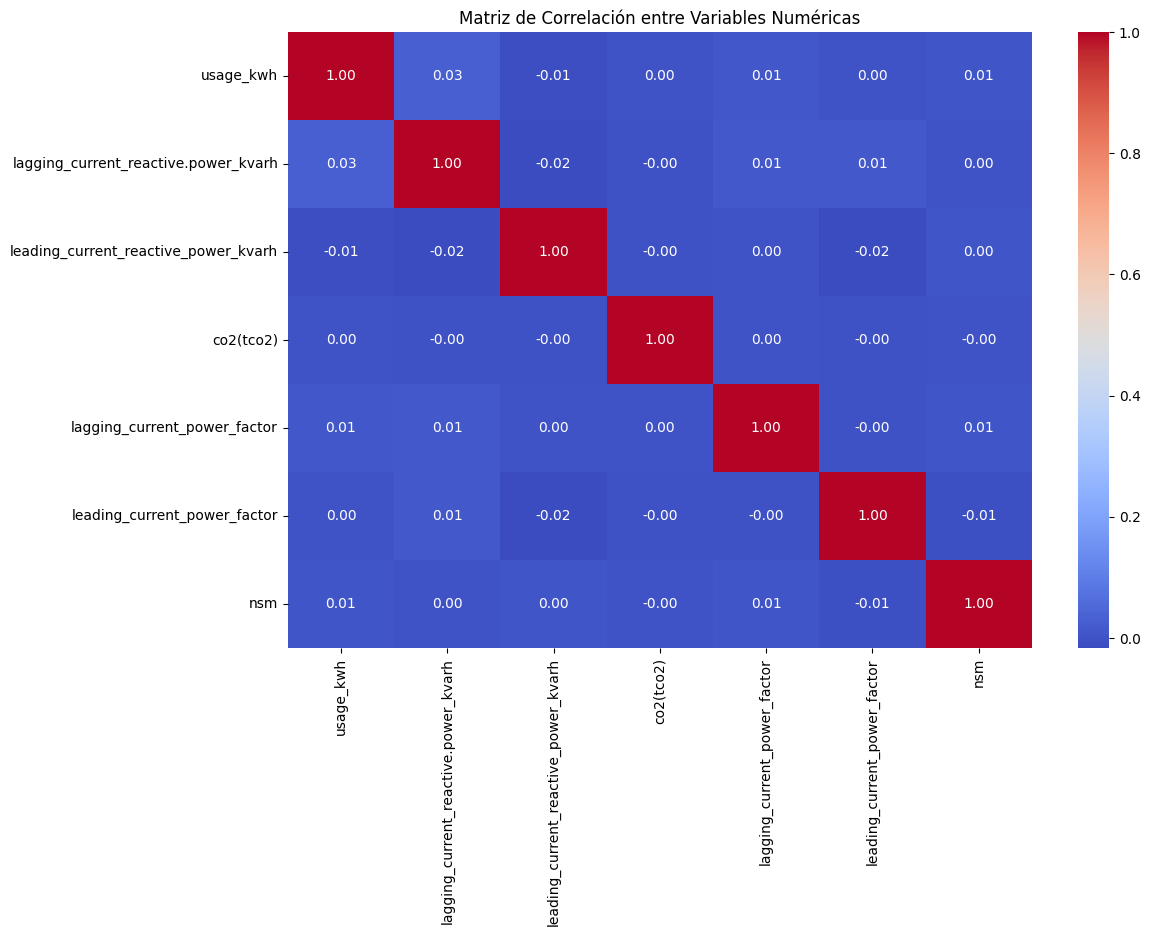

In [20]:
num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Limpieza

## Limpieza Columnas Numéricas

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  13272 non-null  datetime64[ns]
 1   usage_kwh                             35219 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35205 non-null  float64       
 3   leading_current_reactive_power_kvarh  35181 non-null  float64       
 4   co2(tco2)                             35225 non-null  float64       
 5   lagging_current_power_factor          35163 non-null  float64       
 6   leading_current_power_factor          35209 non-null  float64       
 7   nsm                                   35180 non-null  float64       
 8   weekstatus                            35373 non-null  object        
 9   day_of_week                           35408 non-null  object        
 10

In [22]:
# Rellenar valores nulos con la media de cada columna numérica

for col in numeric_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

/var/folders/d2/_ymf9_q51mgdl52l2xg1sq1w0000gn/T/ipykernel_84881/1405607507.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [23]:
#Eliminar outliers extremos solo si hay suficientes datos

for col in numeric_columns:
    if df[col].nunique() > 10:  # Evita columnas con baja variedad
        lower = df[col].quantile(0.002)
        upper = df[col].quantile(0.99)
        df = df[(df[col] >= lower) & (df[col] <= upper)]

In [24]:
df.shape

(33500, 12)

Nos centramos en analisar a fondo distribución de columna 'co2(tco2)' dado que en previas versiones de EDA el analisis de Correlación lineal mostraba practicamente nula correlacion entre esta variable y las demás.

In [25]:
columna = 'co2(tco2)'
print(df[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.96, 0.99,0.995]))

count    33500.000000
mean         0.051197
std          0.317818
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.020000
96%          0.050000
99%          2.636226
99.5%        2.636226
max          2.636226
Name: co2(tco2), dtype: float64


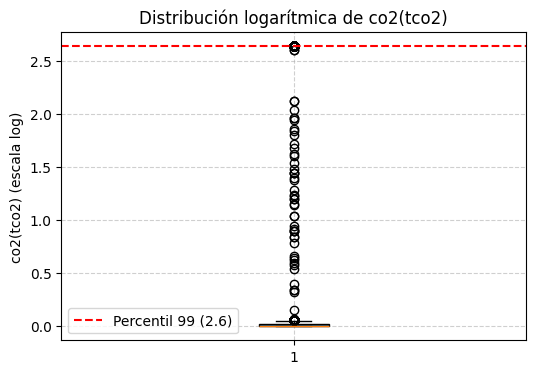

In [26]:
# Ajusta 'nombre_columna' al nombre real de tu variable

percentil_99 = df[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df[columna].dropna(), vert=True, patch_artist=True)
#plt.yscale('log')
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [27]:
p99 = df[columna].quantile(0.99)
print(p99)

df = df[df[columna] <= 0.070]

2.6362262597586934


In [28]:
# Aplicar transformación logarítmica a columnas numéricas si todos los valores son positivos
# para que la distribución se acerque más a una normal

# for col in numeric_columns:
#     if (df[col] > 0).all():
#         df[col] = np.log1p(df[col])

In [29]:
# Aplicar estandarización a columnas numéricas con StandardScaler
# para que tengan media 0 y desviación estándar 1

# Para que posteriores modelos de ML funcionen mejor.


scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Limpieza Variables cat

In [30]:
# Dado los muchos valores categóricos diferentes uniformemente distribuidos y de diferentes
# tipos (strings, números, etc) en las columnas categóricas, se decide eliminar 
# la columna "mixed_type_col" y no intentar limpiarla o transformarla.

df.drop(columns=['mixed_type_col'], inplace=True)

# Analisis Post-limpieza

## Análisis Numerico Post-limpieza

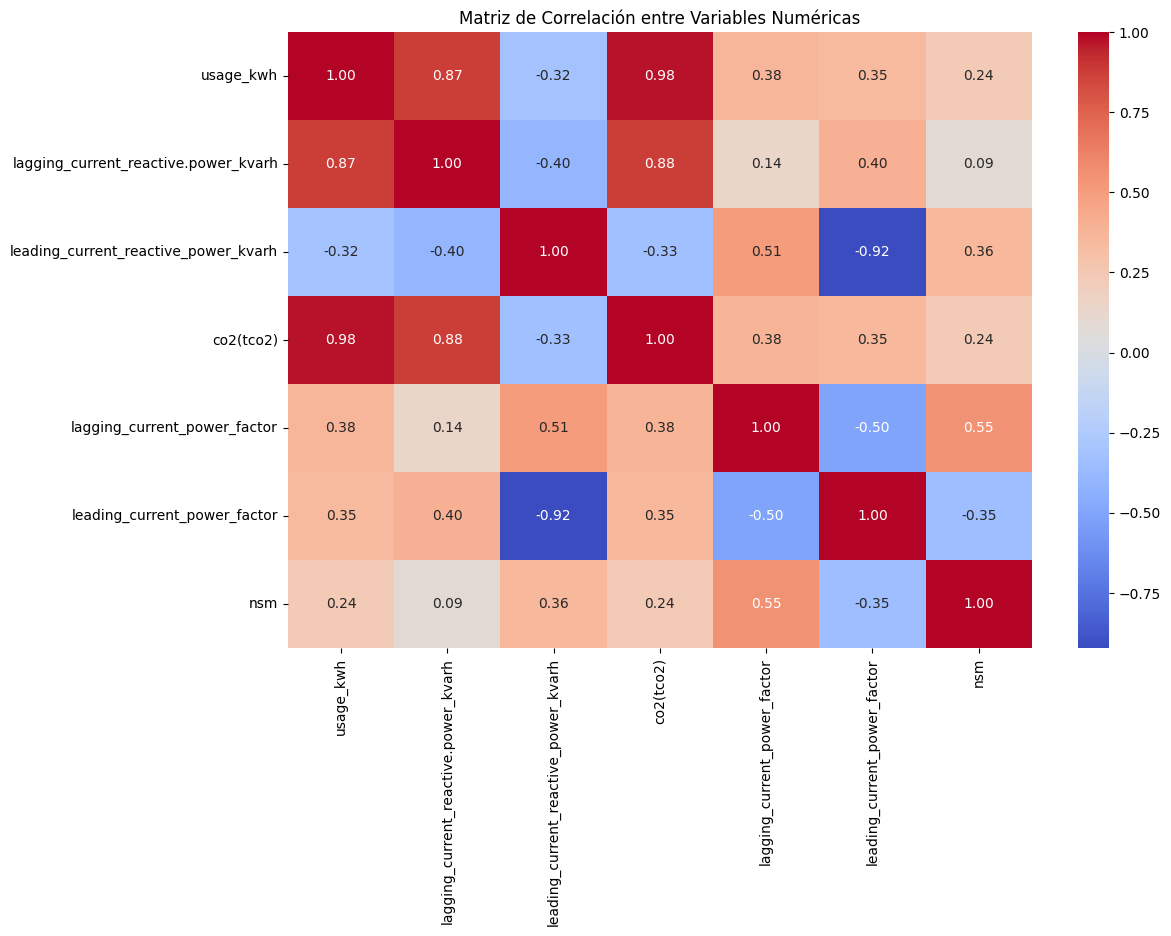

In [31]:
num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Estadísticas para la columna: usage_kwh
count    3.296600e+04
mean    -2.419415e-17
std      1.000015e+00
min     -7.560594e-01
5%      -7.493727e-01
25%     -7.341756e-01
50%     -6.916238e-01
75%      7.058994e-01
96%      2.288401e+00
99%      2.847167e+00
99.5%    3.042153e+00
max      3.500338e+00
Name: usage_kwh, dtype: float64


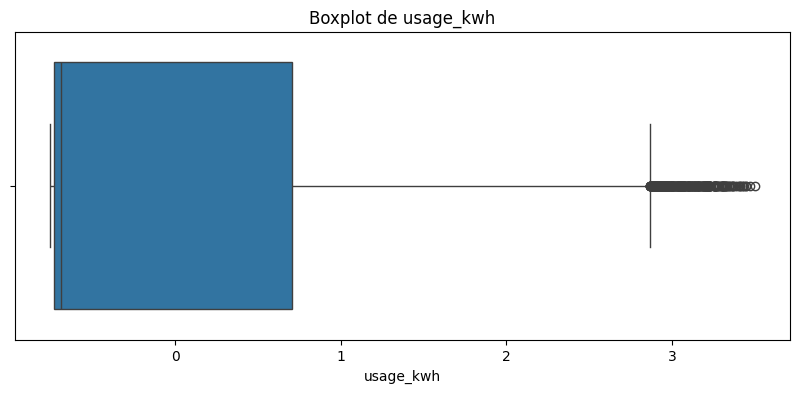

Estadísticas para la columna: lagging_current_reactive.power_kvarh
count    3.296600e+04
mean    -6.727481e-17
std      1.000015e+00
min     -8.153331e-01
5%      -8.153331e-01
25%     -6.639402e-01
50%     -4.987272e-01
75%      5.641641e-01
96%      2.294189e+00
99%      3.013463e+00
99.5%    3.296916e+00
max      3.820682e+00
Name: lagging_current_reactive.power_kvarh, dtype: float64


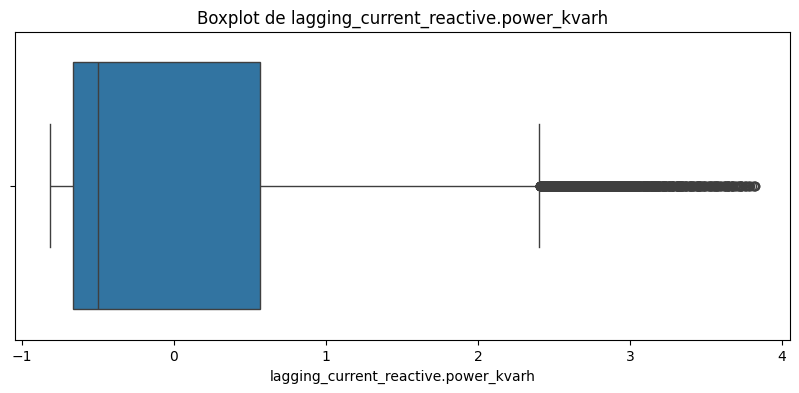

Estadísticas para la columna: leading_current_reactive_power_kvarh
count    3.296600e+04
mean     5.733312e-17
std      1.000015e+00
min     -5.327200e-01
5%      -5.327200e-01
25%     -5.327200e-01
50%     -5.327200e-01
75%     -5.528859e-02
96%      2.462955e+00
99%      3.059055e+00
99.5%    3.112869e+00
max      3.162544e+00
Name: leading_current_reactive_power_kvarh, dtype: float64


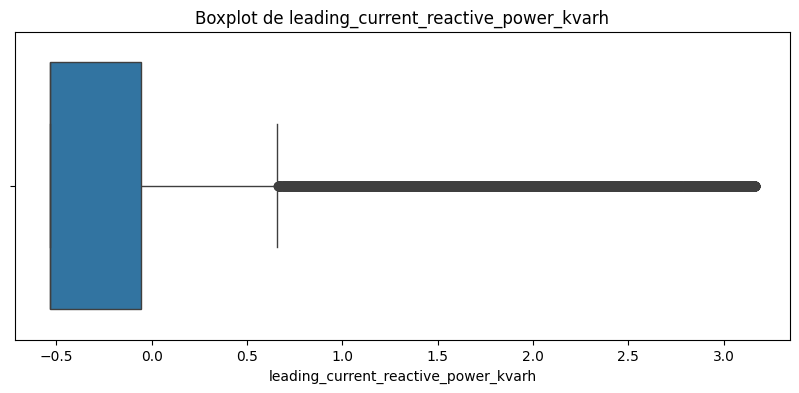

Estadísticas para la columna: co2(tco2)
count    3.296600e+04
mean    -5.719841e-17
std      1.000015e+00
min     -7.145327e-01
5%      -7.145327e-01
25%     -7.145327e-01
50%     -7.145327e-01
75%      5.355819e-01
96%      2.410754e+00
99%      3.035811e+00
99.5%    3.035811e+00
max      3.660868e+00
Name: co2(tco2), dtype: float64


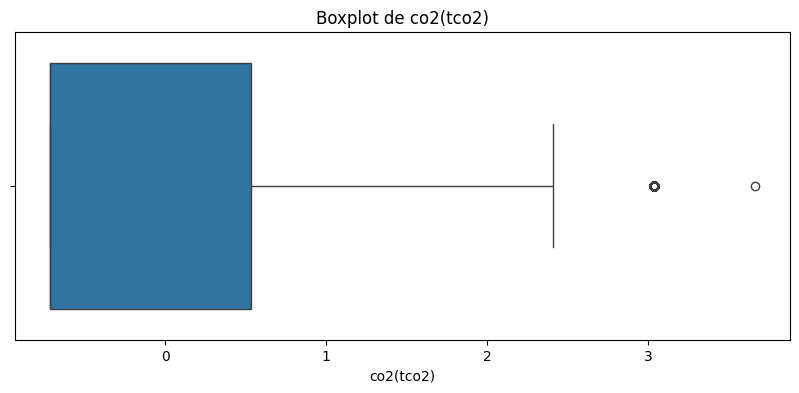

Estadísticas para la columna: lagging_current_power_factor
count    3.296600e+04
mean     3.277256e-16
std      1.000015e+00
min     -2.095165e+00
5%      -1.788406e+00
25%     -9.152000e-01
50%      3.943445e-01
75%      9.904094e-01
96%      1.008392e+00
99%      1.095049e+00
99.5%    1.095049e+00
max      1.095049e+00
Name: lagging_current_power_factor, dtype: float64


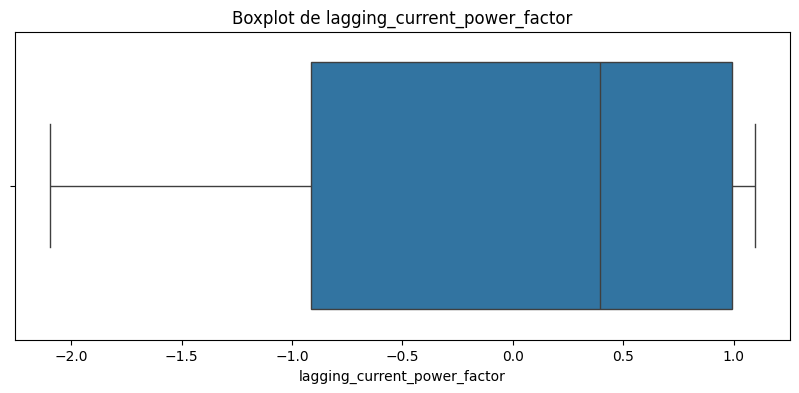

Estadísticas para la columna: leading_current_power_factor
count    3.296600e+04
mean     1.821297e-17
std      1.000015e+00
min     -2.338179e+00
5%      -2.182757e+00
25%      4.924716e-01
50%      4.997466e-01
75%      4.997466e-01
96%      4.997466e-01
99%      8.103121e-01
99.5%    8.103121e-01
max      4.038059e+00
Name: leading_current_power_factor, dtype: float64


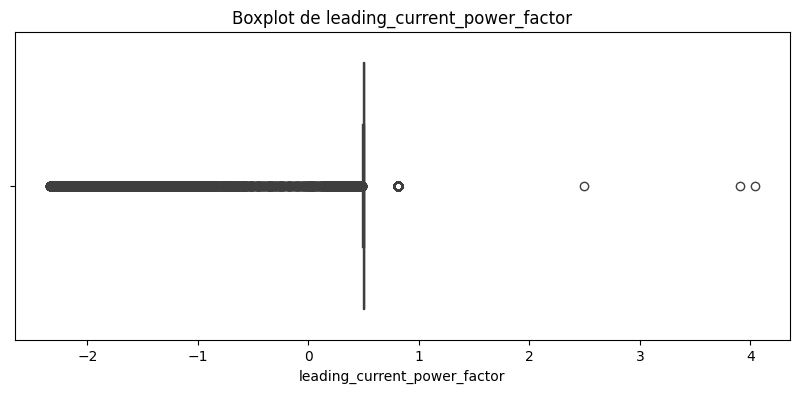

Estadísticas para la columna: nsm
count    3.296600e+04
mean     1.798665e-16
std      1.000015e+00
min     -1.726700e+00
5%      -1.581398e+00
25%     -8.548878e-01
50%      1.692435e-02
75%      8.524110e-01
96%      1.615247e+00
99%      1.724223e+00
99.5%    1.724223e+00
max      1.724223e+00
Name: nsm, dtype: float64


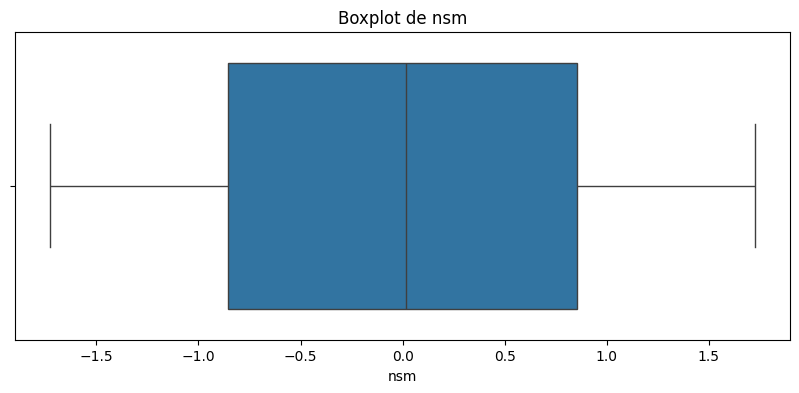

In [32]:
numeric_columns = [
    'usage_kwh', 'lagging_current_reactive.power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2(tco2)',
       'lagging_current_power_factor', 'leading_current_power_factor',
    'nsm'
]


for col in numeric_columns:
    print(f'Estadísticas para la columna: {col}')
    print(df[col].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.96, 0.99,0.995]))
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32966 entries, 1 to 35734
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  12236 non-null  datetime64[ns]
 1   usage_kwh                             32966 non-null  float64       
 2   lagging_current_reactive.power_kvarh  32966 non-null  float64       
 3   leading_current_reactive_power_kvarh  32966 non-null  float64       
 4   co2(tco2)                             32966 non-null  float64       
 5   lagging_current_power_factor          32966 non-null  float64       
 6   leading_current_power_factor          32966 non-null  float64       
 7   nsm                                   32966 non-null  float64       
 8   weekstatus                            32624 non-null  object        
 9   day_of_week                           32663 non-null  object        
 10  loa

# Carga de data procesado


In [34]:
df.head(10)# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("../../data/clean/steel_energy_cleaned_v2.csv", index=False)